# Classification  of drugs

Importing of modules

In [1]:
import numpy as np
from collections import Counter
import seaborn as sb
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Creating the Dataset

In [2]:
data = pd.read_csv("Drug_set.csv", low_memory=False)
lendata = len(data)
sex = []
age = []
PatientID = []
rate = []
choose = ['male', 'female']
for i in range(len(data)):
    rand = random.choice(choose)
    ag = random.randint(15, 80)
    Id = random.randint(1000, 2000)
    ra = random.randint(7, 10)
    sex.append(rand)
    age.append(ag)
    PatientID.append(Id)
    rate.append(ra)
data.insert(loc=0, column='Patient ID', value=PatientID)
data.insert(loc=1, column='Gender', value=sex)
data.insert(loc=2, column='Age', value=age)
data.insert(loc=4, column='Ratings', value=rate)

# Refining/Clean up of Dataset

In [3]:
for column in data.columns:
    test1 = data[column]
    for element in range(len(data)):
        if str(test1[element]).isspace():
            test1[element] = np.nan
    data[column] = test1
data.fillna(np.nan, inplace=True)
data = data.dropna(axis=0, how="any")
data.to_csv("new_drugs.csv", index=False)
tl = len(data)
data = pd.read_csv("new_drugs.csv")
print("Old Data frame:", lendata, "New data frame:", len(data))

C:\Users\VIVEK KULKARNI\AppData\Local\Temp\ipykernel_10048\2629380407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1[element] = np.nan


Old Data frame: 362806 New data frame: 345066


# Sanitizing the Dataset

In [4]:
# Removing Duplicates and Storing in the list
DrugName = data["urlDrugName"]
DrugName = DrugName.to_numpy()
DupremDrug = []
for i in DrugName:
    if i not in DupremDrug:
        lo = i.lower()
        DupremDrug.append(lo)

# Processing

In [5]:
# sorted drug list
DupremDrug.sort()
print("Total Number of Drugs Available: ", len(DupremDrug))
print("The Drugs are: ")
for i in range(len(DupremDrug)):
    print("(", 1+i, ")", DupremDrug[i])
countDrug = data["urlDrugName"].value_counts()
InDrug = str(input("Enter the Drug name to be searched: ")).lower()

Total Number of Drugs Available:  5480
The Drugs are: 
( 1 ) 12 hour decongestant
( 2 ) 12 hour nasal relief spray, non-aerosol
( 3 ) 15dm-100gfn-5peh
( 4 ) 20dm-4cpm
( 5 ) 25dph-7.5peh
( 6 ) 4 way spray, non-aerosol
( 7 ) 40pse-400gfn-20dm
( 8 ) 60pse-400gfn
( 9 ) 8 hour pain relief
( 10 ) a thru z 18 mg-500 mcg-300 mcg-250 mcg tablet
( 11 ) a thru z select
( 12 ) a thru z select tablet multivitamins
( 13 ) a thru z tablet
( 14 ) a-hydrocort vial
( 15 ) abacavir
( 16 ) abacavir-lamivudine
( 17 ) abacavir-lamivudine-zidovudine
( 18 ) abatacept (with maltose) solution, reconstituted (recon soln)
( 19 ) abatacept auto-injector
( 20 ) abatuss dmx
( 21 ) abc plus
( 22 ) abelcet vial
( 23 ) abilify maintena suspension,extended release vial
( 24 ) abiraterone acetate
( 25 ) abraxane vial
( 26 ) abreva cream
( 27 ) absorbase ointment
( 28 ) absorica
( 29 ) abstral tablet, sublingual
( 30 ) acanya gel with pump
( 31 ) acarbose
( 32 ) accupril
( 33 ) accuretic
( 34 ) acebutolol hcl
( 35 ) acero

Enter the Drug name to be searched: stivarga


Details of the stivarga Drug is available


C:\Users\VIVEK KULKARNI\AppData\Local\Temp\ipykernel_10048\2752194887.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i] = "15-20"


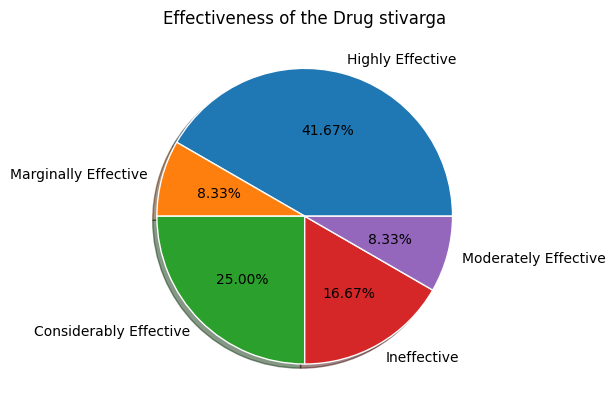

{'Highly Effective': 5, 'Marginally Effective': 1, 'Considerably Effective': 3, 'Ineffective': 2, 'Moderately Effective': 1}


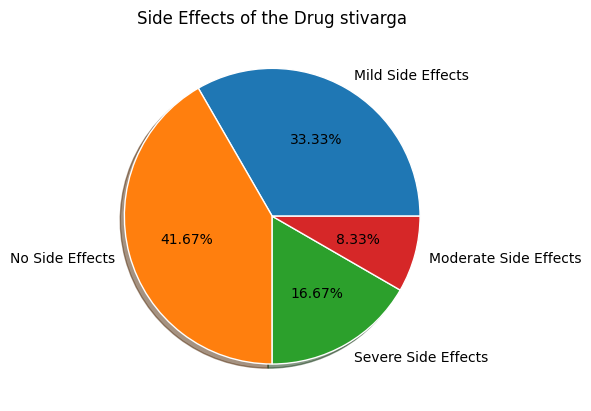

{'Mild Side Effects': 4, 'No Side Effects': 5, 'Severe Side Effects': 2, 'Moderate Side Effects': 1}
The Overall Rating of the Drug  stivarga is 8.25


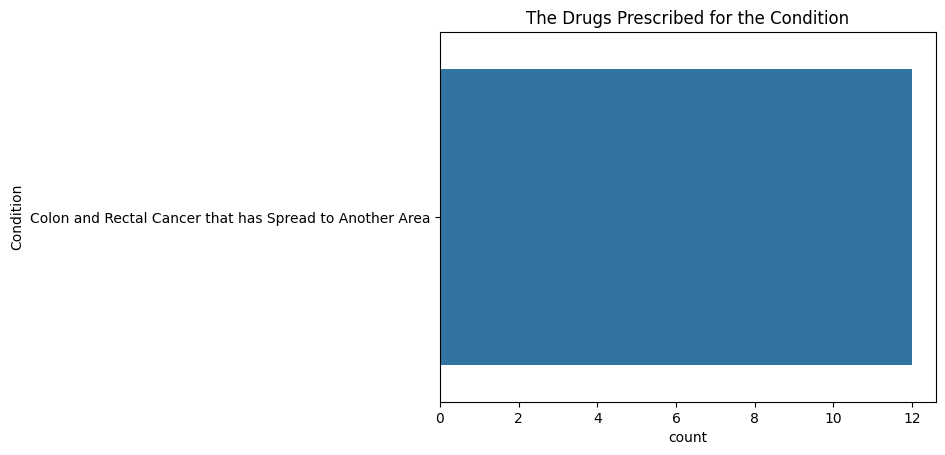

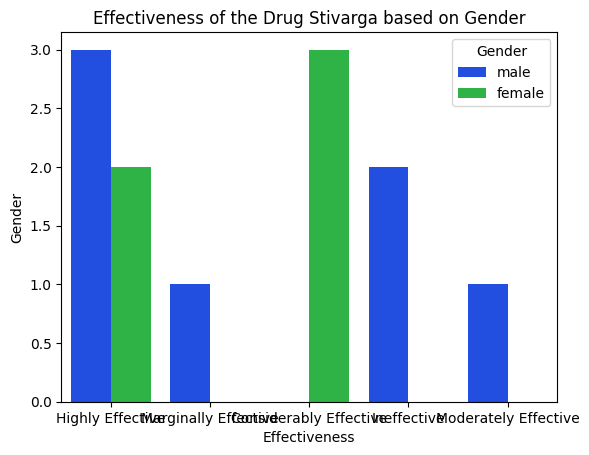

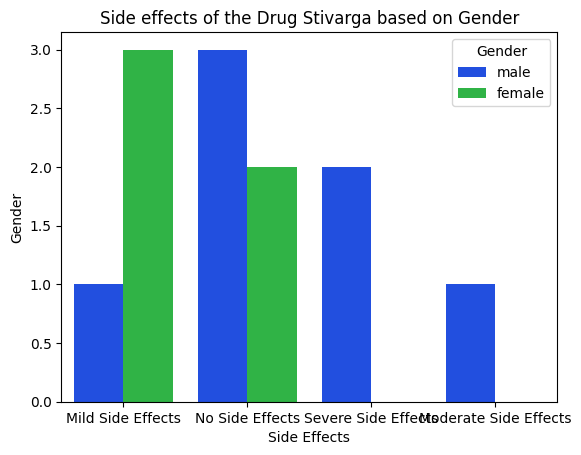

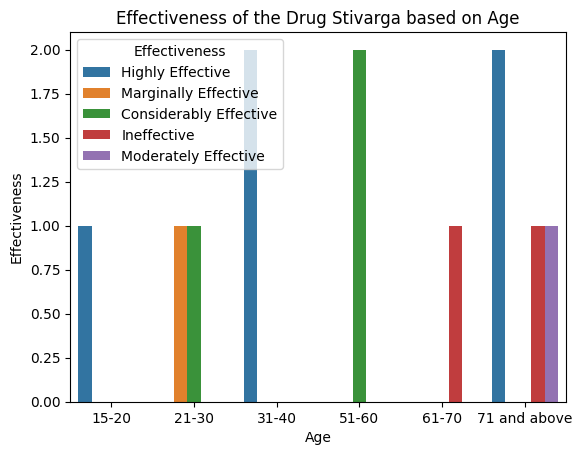

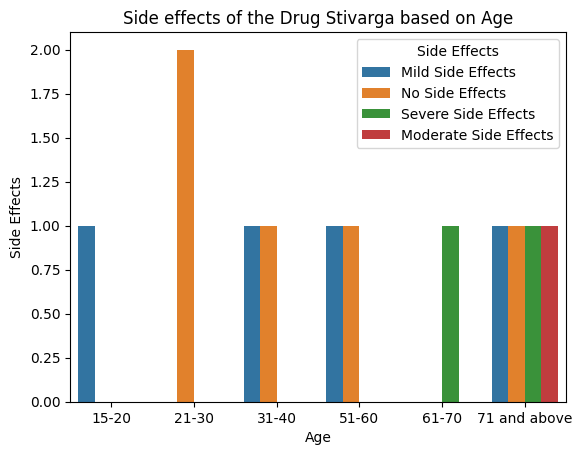

In [6]:
if InDrug in DupremDrug:
    print("Details of the", InDrug, "Drug is available")
    new_data = []
    for i in range(0, len(DrugName)):
        if InDrug in DrugName[i] and len(InDrug) == len(DrugName[i]):
            pos = i
            new_data.append(data.iloc[pos])
    new_data = pd.DataFrame(new_data).sort_values(by='Age')
    new_data.to_csv("new_drug1.csv", index=False)
    new_data = pd.read_csv('new_drug1.csv')
    age = new_data['Age']
    i = 0
    for i in range(0, len(age)):
        if age[i] < 15:
            age[i] = 'below 15'
        elif (age[i] >= 15) and (age[i] <= 20):
            age[i] = "15-20"
        elif (age[i] >= 21) and (age[i] <= 30):
            age[i] = "21-30"
        elif (age[i] >= 31) and (age[i] <= 40):
            age[i] = "31-40"
        elif (age[i] >= 41) and age[i] <= 50:
            age[i] = "41-50"
        elif (age[i] >= 51) and (age[i] <= 60):
            age[i] = "51-60"
        elif (age[i] >= 61) and (age[i] <= 70):
            age[i] = "61-70"
        else:
            age[i] = "71 and above"
    new_data['Age'] = age

    def classify(cs1, tit):

        ct = 0
        cs2 = []
        lt = len(cs1)
        for i1 in cs1:
            if i1 not in cs2:
                cs2.append(i1)
        class1 = {cs: ct for cs in cs2}
        for k in class1:
            ct = 0
            for j in range(0, lt):
                if k in cs1[j]:
                    if (len(k)) == len(cs1[j]):
                        ct = ct + 1
            class1[k] = ct
        plt.title(tit)
        plt.pie(class1.values(), labels=class1.keys(), radius=1, autopct='%0.2f%%', shadow=True,
                wedgeprops={'edgecolor': 'white', 'linewidth': 1})
        plt.show()
        return class1

    Effectiveness = new_data['Effectiveness'].to_numpy()
    effect = classify(Effectiveness, ("Effectiveness of the Drug " + InDrug))
    print(effect)
    SideEffects = new_data['Side Effects'].to_numpy()
    sideEffects = classify(SideEffects, ("Side Effects of the Drug " + InDrug))
    print(sideEffects)
    rating = new_data['Ratings']
    rating = rating.to_numpy()
    rate = 0
    avg = 0
    for i in range(0, len(new_data)):
        rate = rating[i] + rate
        avg = avg + 1
    print("The Overall Rating of the Drug ", InDrug, "is", format(rate / avg, '0.2f'))
    sb.countplot(y='Condition', data=new_data)
    plt.title("The Drugs Prescribed for the Condition")
    plt.show()
    data1 = new_data['Effectiveness']
    sb.countplot(x='Effectiveness', data=new_data, hue='Gender', hue_order=['male', 'female'], palette='bright6')
    plt.ylabel('Gender')
    plt.title('Effectiveness of the Drug ' + InDrug.capitalize() + ' based on Gender')
    plt.show()
    sb.countplot(x='Side Effects', data=new_data, hue='Gender', hue_order=['male', 'female'], palette='bright6')
    plt.ylabel('Gender')
    plt.title('Side effects of the Drug ' + InDrug.capitalize() + ' based on Gender')
    plt.show()
    sb.countplot(x='Age', data=new_data.head(len(new_data)), hue='Effectiveness')
    plt.ylabel('Effectiveness')
    plt.title('Effectiveness of the Drug ' + InDrug.capitalize() + ' based on Age')
    plt.show()
    sb.countplot(x='Age', data=new_data.head(len(new_data)), hue='Side Effects')
    plt.ylabel('Side Effects')
    plt.title('Side effects of the Drug ' + InDrug.capitalize() + ' based on Age')
    plt.show()

    count = Counter(new_data['urlDrugName'])
    count = count[InDrug]
    if int(count) > 150:
        data1 = new_data['Effectiveness']
        data2 = []
        for i in data1:
            if i == 'Ineffective' or i == ' Marginally Effective ':
                data2.append(0)
            elif i == " Moderately Effective " or i == ' Considerably Effective ':
                data2.append(1)
            elif i == ' Highly Effective ' and len(i) == len(' Highly Effective '):
                data2.append(3)
        new_data['Effectiveness'] = data2
        data2 = []
        for i in new_data['Gender']:
            if i == 'male':
                data2.append(0)
            else:
                data2.append(1)
        new_data['Gender'] = data2
        data2 = []
        data1 = new_data['Side Effects']
        for i in data1:
            if i == ' No Side Effects ' or i == ' Mild Side Effects ':
                data2.append(0)
            elif i == " Moderate Side Effects ":
                data2.append(1)
            elif i == ' Severe Side Effects ' or i == ' Extremely Severe Side Effects ':
                data2.append(2)
        new_data['Side Effects'] = data2
        target = new_data['Effectiveness']
        cols = ['urlDrugName', 'Condition', 'Sides', 'Age']
        for x in cols:
            new_data[x] = pd.factorize(new_data[x])[0]
        new_data.to_csv("new_data.csv", index=False)
        new_data = pd.read_csv('new_data.csv')
        # SVM Classification
        scaler = StandardScaler()
        df = scaler.fit_transform(new_data)
        x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.4, random_state=42)
        x_test_scaled = scale(x_test)
        svm_clf = SVC(random_state=42, class_weight='balanced')
        svm_clf.fit(x_train, y_train)
        svm_pred = svm_clf.predict(x_test)
        print(classification_report(y_test, svm_pred))
        cm = confusion_matrix(y_test, svm_pred, labels=svm_clf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ineffective', 'Moderately', 'Highly'])
        disp.plot()
        plt.show()
        cnf_matrix = cm
        print(cm, cnf_matrix)
        FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
        FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
        TP = np.diag(cnf_matrix)
        TN = cnf_matrix.sum() - (FP + FN + TP)
        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)
        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP / (TP + FN)
        # Precision or positive predictive value
        PPV = TP / (TP + FP)
        # Overall accuracy for each class
        ACC = (TP + TN) / (TP + FP + FN + TN)
        F1 = (2*PPV*TPR)/(PPV+TPR)
        print(TPR, ACC, PPV, F1)
        # Random Forest Classifier
        target = new_data['Side Effects']
        scaler = StandardScaler()
        df = scaler.fit_transform(new_data)
        x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.4, random_state=42)
        rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
        rf_clf.fit(x_train, y_train)
        rf_pred = rf_clf.predict(x_test)
        print(classification_report(y_test, rf_pred))
        cm = confusion_matrix(y_test, rf_pred, labels=rf_clf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[' No Side Effects ', ' Moderate Side Effects ',
                                                                           ' Severe Side Effects '])
        disp.plot()
        plt.show()
else:
    print("The details of the Drug is not available")